### Fourrier Transform ###

The fourrier transform provides the spectrum of frequencies in a image.
It can be useful in order to identify characteristics of images.
For example: letters can be indentified by their characteristic spectrum, even in different fonts.

In [1]:
import numpy as np
import cv2

In [20]:
import sys
sys.path.append('C:/Users/Mafeus/Desktop/Git_Repos/OpenCV')
import OpCV_Utils

In [21]:
img1 = cv2.imread('lines_img1.png')
img2 = cv2.imread('lines_img2.png')

In [22]:
img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

In [ ]:
f1 = np.fft.fft2(img1_gray)
f1 = np.fft.fftshift(f1)
magnitude_spectrum1 = 20*np.log(np.abs(f1))
magnitude_spectrum1 = magnitude_spectrum1.astype('uint8')

f2 = np.fft.fft2(img2_gray)
f2 = np.fft.fftshift(f2)
magnitude_spectrum2 = 20*np.log(np.abs(f2))
magnitude_spectrum2 = magnitude_spectrum2.astype('uint8')

magnitude_spectrum1 = cv2.cvtColor(magnitude_spectrum1, cv2.COLOR_GRAY2BGR)
magnitude_spectrum2 = cv2.cvtColor(magnitude_spectrum2, cv2.COLOR_GRAY2BGR)

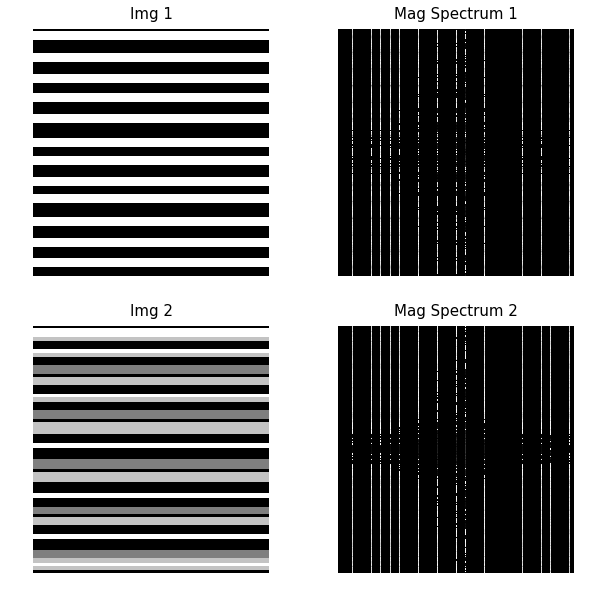

In [81]:
OpCV_Utils.show_multiple_imgs_plt([[img1, magnitude_spectrum1], [img2, magnitude_spectrum2]], 
                                  [['Img 1', 'Mag Spectrum 1'], ['Img 2', 'Mag Spectrum 2']], fig_size=(10,10))

In [86]:
def imgFourrierTransform(img):
    
    # Convert img to gray:
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Compute the FFT and adjust high frequencies to the middle:
    f = np.fft.fft2(img_gray)
    f = np.fft.fftshift(f)
    magnitude_spectrum = 20*np.log(np.abs(f))
    
    # Adjust img to output:
    magnitude_spectrum = magnitude_spectrum.astype('uint8')
    magnitude_spectrum = cv2.cvtColor(magnitude_spectrum, cv2.COLOR_GRAY2RGB)
    
    return magnitude_spectrum

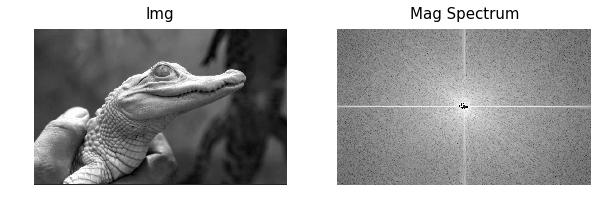

In [88]:
img = cv2.imread('baby_gator.png')

magnitude_spectrum = imgFourrierTransform(img)

img_gray = cv2.cvtColor(img[:,:,0], cv2.COLOR_GRAY2RGB)
OpCV_Utils.show_multiple_imgs_plt([[img_gray, magnitude_spectrum]], [['Img', 'Mag Spectrum']], fig_size=(10,10))

#### Testing with Letters #####

In [77]:
import glob
images = glob.glob('letters/*')

In [78]:
imgs_array = []
titles_array = []

for i, img_path in enumerate(images):
    
    img = cv2.imread(img_path)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    f1 = np.fft.fft2(img_gray)
    f1 = np.fft.fftshift(f1)
    magnitude_spectrum = 20*np.log(np.abs(f1))
    magnitude_spectrum = magnitude_spectrum.astype('uint8')

    img_gray = cv2.cvtColor(img_gray, cv2.COLOR_GRAY2RGB)
    magnitude_spectrum = cv2.cvtColor(magnitude_spectrum, cv2.COLOR_GRAY2RGB)
    
    imgs_array.append([img_gray, magnitude_spectrum])
    titles_array.append(['',''])    

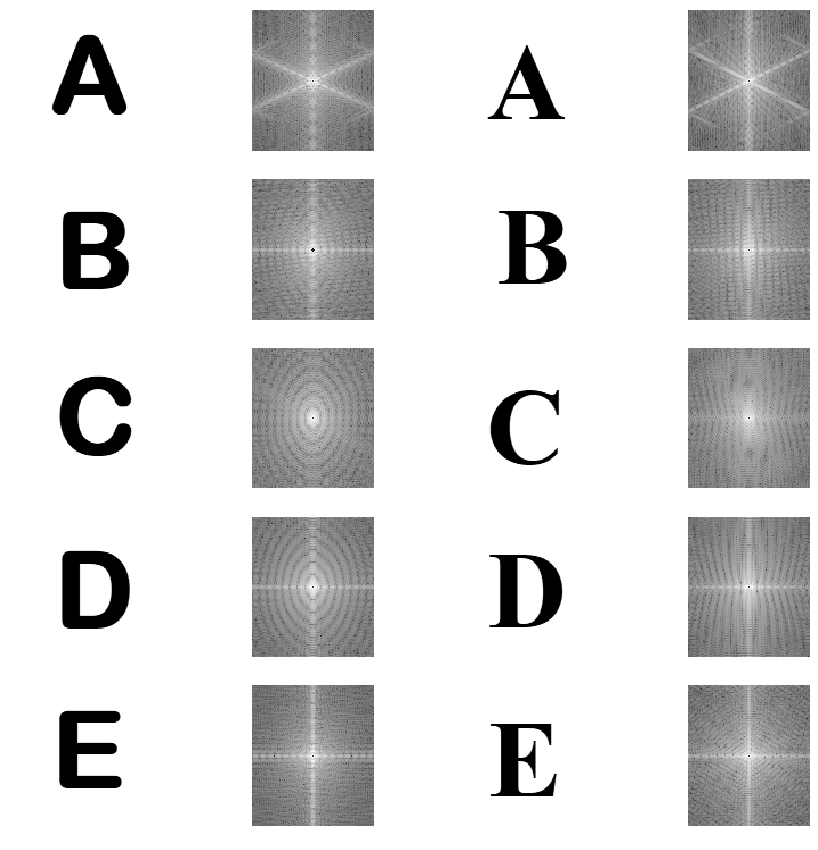

In [79]:
imgs = [[imgs_array[0][0], imgs_array[0][1], imgs_array[1][0], imgs_array[1][1]],
        [imgs_array[2][0], imgs_array[2][1], imgs_array[3][0], imgs_array[3][1]], 
        [imgs_array[4][0], imgs_array[4][1], imgs_array[5][0], imgs_array[5][1]],
        [imgs_array[6][0], imgs_array[6][1], imgs_array[7][0], imgs_array[7][1]],
        [imgs_array[8][0], imgs_array[8][1], imgs_array[9][0], imgs_array[9][1]]]

titles = [[titles_array[0][0], titles_array[0][1], titles_array[1][0], titles_array[1][1]],
          [titles_array[2][0], titles_array[2][1], titles_array[3][0], titles_array[3][1]], 
          [titles_array[4][0], titles_array[4][1], titles_array[5][0], titles_array[5][1]],
          [titles_array[6][0], titles_array[6][1], titles_array[7][0], titles_array[7][1]],
          [titles_array[8][0], titles_array[8][1], titles_array[9][0], titles_array[9][1]]]

OpCV_Utils.show_multiple_imgs_plt(imgs, titles, fig_size=(15,15))